# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
!pip -q install sastrawi

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/har-wicak/Product-Review-NLP/main/20191002-product-reviews.csv')
astype= df.astype(str)
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [5]:
df.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [6]:
df.drop(['itemId', 'name', 'originalRating', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'retrievedDate'], axis = 1, inplace = True)

df

,category,rating,reviewTitle,reviewContent,clientType
0,beli-harddisk-eksternal,5,NaN,bagus mantap dah sesui pesanan,androidApp
1,beli-harddisk-eksternal,4,NaN,"Bagus, sesuai foto",androidApp
2,beli-harddisk-eksternal,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,androidApp
3,beli-harddisk-eksternal,4,NaN,bagus sesuai,androidApp
4,beli-harddisk-eksternal,5,NaN,NaN,androidApp
...,...,...,...,...,...
203782,shop-televisi-digital,5,murah,barang bagus dengan harga kompetitif,desktop
203783,shop-televisi-digital,3,barang bagus dan sesuai pesanan,NaN,androidApp
203784,shop-televisi-digital,5,NaN,NaN,androidApp
203785,shop-televisi-digital,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,mobile-app


In [7]:
print((str((df['reviewContent'].isnull().sum())/df.reviewContent.shape[0]*100) + " %"))

47.479966828109745 %


In [8]:
df.loc[df['reviewContent'].isnull(),'reviewContent']= df['reviewTitle']

In [9]:
print((str((df['reviewContent'].isnull().sum())/df.reviewContent.shape[0]*100) + " %"))

46.3385790065117 %


In [10]:
df.shape

(203787, 5)

In [11]:
df = df[df['reviewContent'].notna()]

df

,category,rating,reviewTitle,reviewContent,clientType
0,beli-harddisk-eksternal,5,NaN,bagus mantap dah sesui pesanan,androidApp
1,beli-harddisk-eksternal,4,NaN,"Bagus, sesuai foto",androidApp
2,beli-harddisk-eksternal,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,androidApp
3,beli-harddisk-eksternal,4,NaN,bagus sesuai,androidApp
7,beli-harddisk-eksternal,1,ada pengirimn ntb bima,bima,androidApp
...,...,...,...,...,...
203781,shop-televisi-digital,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,desktop
203782,shop-televisi-digital,5,murah,barang bagus dengan harga kompetitif,desktop
203783,shop-televisi-digital,3,barang bagus dan sesuai pesanan,barang bagus dan sesuai pesanan,androidApp
203785,shop-televisi-digital,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,mobile-app


In [12]:
df.drop(['reviewTitle'], axis = 1, inplace = True)

df

C:\Users\harwi\AppData\Local\Temp\ipykernel_13996\64809112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['reviewTitle'], axis = 1, inplace = True)


,category,rating,reviewContent,clientType
0,beli-harddisk-eksternal,5,bagus mantap dah sesui pesanan,androidApp
1,beli-harddisk-eksternal,4,"Bagus, sesuai foto",androidApp
2,beli-harddisk-eksternal,5,okkkkk mantaaaaaaapppp ... goood,androidApp
3,beli-harddisk-eksternal,4,bagus sesuai,androidApp
7,beli-harddisk-eksternal,1,bima,androidApp
...,...,...,...,...
203781,shop-televisi-digital,1,seller incapable to keep his product page clea...,desktop
203782,shop-televisi-digital,5,barang bagus dengan harga kompetitif,desktop
203783,shop-televisi-digital,3,barang bagus dan sesuai pesanan,androidApp
203785,shop-televisi-digital,3,Ok.thank lazada Pagi order sore barang nyampe ...,mobile-app


In [13]:
df['category'].unique()

array(['beli-harddisk-eksternal', 'beli-laptop', 'beli-smart-tv',
       'jual-flash-drives', 'shop-televisi-digital'], dtype=object)

In [14]:
df['clientType'].unique()

array(['androidApp', 'mobile', 'mobile-app', 'desktop', 'iosApp'],
      dtype=object)

In [15]:
print('Total Jumlah Review:', df.shape[0], 'data\n')
print('terdiri dari (label):')
print('rating-1:', df[df.rating == 1].shape[0], 'data')
print('rating-2:', df[df.rating == 2].shape[0], 'data')
print('rating-3:', df[df.rating == 3].shape[0], 'data')
print('rating-4:', df[df.rating == 4].shape[0], 'data')
print('rating-5:', df[df.rating == 5].shape[0], 'data')

Total Jumlah Review: 109355 data

terdiri dari (label):
rating-1: 7214 data
rating-2: 2237 data
rating-3: 4535 data
rating-4: 10937 data
rating-5: 84432 data


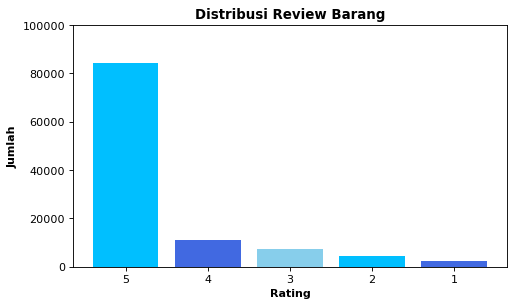

In [16]:
height = df['rating'].value_counts()
labels = ('5', '4', '3', '2', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,100000)
plt.title('Distribusi Review Barang', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

In [17]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [18]:
raw_sample = df['reviewContent'][50]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Laptop ini memiliki spesifikasi yang bagus dan harga yang terjangkau, namun pada tab spesifikasi utama produk itu emang intel core i5 atau salah buat? Di judul dikatakan core i7
Case folding	:  laptop ini memiliki spesifikasi yang bagus dan harga yang terjangkau namun pada tab spesifikasi utama produk itu emang intel core i atau salah buat di judul dikatakan core i


In [19]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
key_norm

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
...,...,...,...
3715,3716,ywdah,ya sudah
3716,3717,ywdh,ya sudah
3717,3718,ywdhlh,ya sudahlah
3718,3719,ywis,ya sudah


In [20]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [22]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [23]:
def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [24]:
raw_sample = df['reviewContent'].iloc[50]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Flashdisk ori, Packing bagus. Saya suka.Thx
Case folding		:  flashdisk ori packing bagus saya sukathx
Stopword removal	:  flashdisk ori packing bagus sukathx


In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [26]:
raw_sample = df['reviewContent'].iloc[50]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Flashdisk ori, Packing bagus. Saya suka.Thx
Case folding		:  flashdisk ori packing bagus saya sukathx
Stopword removal	:  flashdisk ori packing bagus sukathx
Stemming		:  flashdisk ori packing bagus sukathx


In [27]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [28]:
df2 = df.sample(n=5000)

In [29]:
df2.shape

(10000, 4)

In [30]:
%%time
df2['clean_teks'] = df2['reviewContent'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: total: 33min
Wall time: 34min 9s


In [32]:
df2

,category,rating,reviewContent,clientType,clean_teks
53311,beli-harddisk-eksternal,5,Cepat kaya express,androidApp,cepat kaya express
49335,beli-harddisk-eksternal,5,Barang sudah sampai. Makasih lazada,mobile,barang terimakasih lazada
99450,beli-smart-tv,5,"beli kemarin, datang hari ini. Kualitas terbai...",androidApp,beli kemarin kualitas baik bungkus bubble wrap...
60659,beli-harddisk-eksternal,4,"packing bagus,,tv jg bagus,,cm d layar ad gari...",androidApp,packing bagustv baguscm d layar garis gtugmn n...
28104,beli-harddisk-eksternal,5,Baru nyampe lngsung testing.. Hasilny mantap l...,androidApp,langsung testing hasilny mantap lancar jaya be...
...,...,...,...,...,...
163126,jual-flash-drives,5,Sesuai dg deskripsi..maaf tlt soanya sya sibuk...,androidApp,sesuai deskripsimaaf tlt soanya sibukall of goood
92215,beli-smart-tv,5,murah dan bagus...makasih ya,desktop,murah bagusmakasih ya
188034,shop-televisi-digital,5,brangnya bagus alhamdulilah ..pengirimannya ex...,androidApp,brangnya bagus alhamdulillah kirim express pag...
26664,beli-harddisk-eksternal,4,"barang diterima, mudah mudahan berfungsi denga...",androidApp,barang terima mudah mudah fungsi


In [34]:
df2.to_csv('clean_data.csv')

In [35]:
# Pisahkan kolom feature dan target
X = df2['clean_teks']
y = df2['rating']

In [36]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(X)

CountVectorizer()

In [37]:
# Melihat Jumlah Fitur
print(len(vec.get_feature_names_out()))

8797


In [38]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['aa' 'aaa' 'aaaaaaaasika' ... 'zuma' 'zuper' 'zzz']


In [39]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,aa,aaa,aaaaaaaasika,aaaakena,aaamiiiin,aaamiin,aaamin,aada,aalaupun,aamiin,...,yutup,yuv,zaman,zamanya,zenfone,zimple,zonk,zuma,zuper,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
with open('bow.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)